In [14]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

ADHD_1_path = '/Users/yeobinee/Desktop/prismlab/ADHD/IEEE ADHD Data sets/ADHD_part1_npy'
ADHD_2_path = '/Users/yeobinee/Desktop/prismlab/ADHD/IEEE ADHD Data sets/ADHD_part2_npy'


ADHD_1 = [f for f in os.listdir(ADHD_1_path) if f.endswith('.npy')]
ADHD_2 = [f for f in os.listdir(ADHD_2_path) if f.endswith('.npy')]

print(f"총 {len(ADHD_1)}개 npy 파일")
print(f"총 {len(ADHD_2)}개 npy 파일")

총 30개 npy 파일
총 31개 npy 파일


### 4s segment data

In [20]:
def split_into_segments(data, segment_len=512):
    time_len = data.shape[1]
    n_segments = time_len // segment_len
    segments = [data[:, i*segment_len:(i+1)*segment_len] for i in range(n_segments)]
    return segments

subject_segments = {}  # key: file name, value: list of segments

for file_name in ADHD_1:
    file_path = os.path.join(ADHD_1_path, file_name)
    data = np.load(file_path)  # (19, 시간)

    segments = split_into_segments(data)
    subject_segments[file_name] = segments
    print(f"{file_name}: {len(segments)}개 세그먼트 생성됨")

print(f"\n 총 {len(subject_segments)}개 subject의 세그먼트 분할")

v15p.npy: 84개 세그먼트 생성됨
v8p.npy: 30개 세그먼트 생성됨
v39p.npy: 35개 세그먼트 생성됨
v19p.npy: 45개 세그먼트 생성됨
v35p.npy: 29개 세그먼트 생성됨
v34p.npy: 38개 세그먼트 생성됨
v22p.npy: 23개 세그먼트 생성됨
v18p.npy: 48개 세그먼트 생성됨
v38p.npy: 48개 세그먼트 생성됨
v14p.npy: 34개 세그먼트 생성됨
v25p.npy: 19개 세그먼트 생성됨
v33p.npy: 57개 세그먼트 생성됨
v29p.npy: 47개 세그먼트 생성됨
v28p.npy: 53개 세그먼트 생성됨
v12p.npy: 34개 세그먼트 생성됨
v32p.npy: 35개 세그먼트 생성됨
v3p.npy: 65개 세그먼트 생성됨
v24p.npy: 32개 세그먼트 생성됨
v31p.npy: 22개 세그먼트 생성됨
v27p.npy: 56개 세그먼트 생성됨
v10p.npy: 27개 세그먼트 생성됨
v1p.npy: 23개 세그먼트 생성됨
v30p.npy: 42개 세그먼트 생성됨
v40p.npy: 39개 세그먼트 생성됨
v37p.npy: 18개 세그먼트 생성됨
v173.npy: 47개 세그먼트 생성됨
v6p.npy: 34개 세그먼트 생성됨
v21p.npy: 32개 세그먼트 생성됨
v20p.npy: 69개 세그먼트 생성됨
v36p.npy: 33개 세그먼트 생성됨

 총 30개 subject의 세그먼트 분할


In [23]:
# 전극 정보
channel_names = [
    'Fp1', 'Fp2', 'F3', 'F4', 'C3',
    'C4', 'P3', 'P4', 'O1', 'O2',
    'F7', 'F8', 'T7', 'T8', 'P7',
    'P8', 'Fz', 'Cz', 'Pz'
]
target_channels = ['Fz', 'F8', 'F3', 'C4', 'C3', 'F7']
target_indices = [channel_names.index(ch) for ch in target_channels]

In [24]:
# 6채널만 자르기
def split_into_segments(data, segment_len=512, target_indices=None):
    if target_indices is not None:
        data = data[target_indices, :]  # (6, time)
    time_len = data.shape[1]
    n_segments = time_len // segment_len
    segments = [data[:, i*segment_len:(i+1)*segment_len] for i in range(n_segments)]
    return segments

subject_segments = {}

for file_name in ADHD_1:
    file_path = os.path.join(ADHD_1_path, file_name)
    data = np.load(file_path)

    segments = split_into_segments(data, segment_len=512, target_indices=target_indices)
    subject_segments[file_name] = segments
    print(f"{file_name}: {len(segments)}개 세그먼트 생성됨 (6채널)")

v15p.npy: 84개 세그먼트 생성됨 (6채널)
v8p.npy: 30개 세그먼트 생성됨 (6채널)
v39p.npy: 35개 세그먼트 생성됨 (6채널)
v19p.npy: 45개 세그먼트 생성됨 (6채널)
v35p.npy: 29개 세그먼트 생성됨 (6채널)
v34p.npy: 38개 세그먼트 생성됨 (6채널)
v22p.npy: 23개 세그먼트 생성됨 (6채널)
v18p.npy: 48개 세그먼트 생성됨 (6채널)
v38p.npy: 48개 세그먼트 생성됨 (6채널)
v14p.npy: 34개 세그먼트 생성됨 (6채널)
v25p.npy: 19개 세그먼트 생성됨 (6채널)
v33p.npy: 57개 세그먼트 생성됨 (6채널)
v29p.npy: 47개 세그먼트 생성됨 (6채널)
v28p.npy: 53개 세그먼트 생성됨 (6채널)
v12p.npy: 34개 세그먼트 생성됨 (6채널)
v32p.npy: 35개 세그먼트 생성됨 (6채널)
v3p.npy: 65개 세그먼트 생성됨 (6채널)
v24p.npy: 32개 세그먼트 생성됨 (6채널)
v31p.npy: 22개 세그먼트 생성됨 (6채널)
v27p.npy: 56개 세그먼트 생성됨 (6채널)
v10p.npy: 27개 세그먼트 생성됨 (6채널)
v1p.npy: 23개 세그먼트 생성됨 (6채널)
v30p.npy: 42개 세그먼트 생성됨 (6채널)
v40p.npy: 39개 세그먼트 생성됨 (6채널)
v37p.npy: 18개 세그먼트 생성됨 (6채널)
v173.npy: 47개 세그먼트 생성됨 (6채널)
v6p.npy: 34개 세그먼트 생성됨 (6채널)
v21p.npy: 32개 세그먼트 생성됨 (6채널)
v20p.npy: 69개 세그먼트 생성됨 (6채널)
v36p.npy: 33개 세그먼트 생성됨 (6채널)


In [25]:
for file_name, segments in subject_segments.items():
    for i, seg in enumerate(segments):
        if seg.shape != (6, 512):
            print(f"{file_name}의 {i}번째 세그먼트 shape 이상: {seg.shape}")

In [26]:
# 첫 subject의 첫 세그먼트 shape 확인
sample_file = list(subject_segments.keys())[0]
sample_segment = subject_segments[sample_file][0]
print(f"{sample_file} 첫 세그먼트 shape: {sample_segment.shape}")

v15p.npy 첫 세그먼트 shape: (6, 512)


### PSR 함수 (최적 파라미터 적용)

In [ ]:
def time_delay_embedding(signal, m=2, tau=10):
    """
    단일 채널 시계열을 위상공간으로 임베딩하여 point cloud 생성

    Parameters:
        signal (1D np.array): 시계열 데이터 (길이 T)
        m (int): 임베딩 차원
        tau (int): 시간 지연 간격

    Returns:
        np.ndarray: shape (T - (m - 1) * tau, m)의 point cloud
    """
    N = len(signal)
    if N < (m - 1) * tau + 1:
        raise ValueError("시계열 길이가 너무 짧습니다.")
    
    embedded = np.array([
        signal[i : i + m * tau : tau]
        for i in range(N - (m - 1) * tau)
    ])
    return embedded  # shape: (N', m)

In [28]:
segment = subject_segments[sample_file][0]  # shape: (6, 512)

channel_point_clouds = []

for i in range(segment.shape[0]):  # 6채널 반복
    ch_signal = segment[i, :]  # shape: (512,)
    pc = time_delay_embedding(ch_signal, m=3, tau=5)  # shape: (T', 3)
    channel_point_clouds.append(pc)

# 6채널의 point cloud 합치기 (joint embedding)
joint_point_cloud = np.concatenate(channel_point_clouds, axis=0)  # shape: (6*T', 3)

print(f"Point cloud shape: {joint_point_cloud.shape}")

Point cloud shape: (3012, 3)


### point cloud → PD

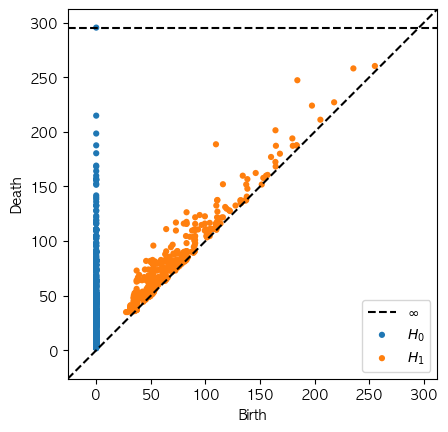

In [29]:
from ripser import ripser
import persim

# PD 계산
result = ripser(joint_point_cloud, maxdim=1)  # H0, H1 계산
diagrams = result['dgms']

# 시각화 (옵션)
persim.plot_diagrams(diagrams, show=True)

### Graph

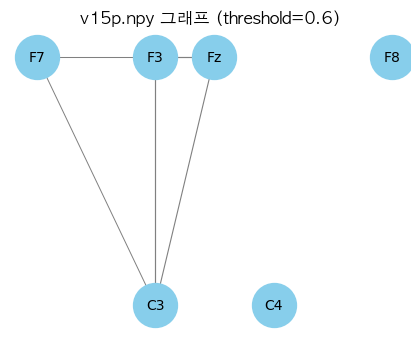

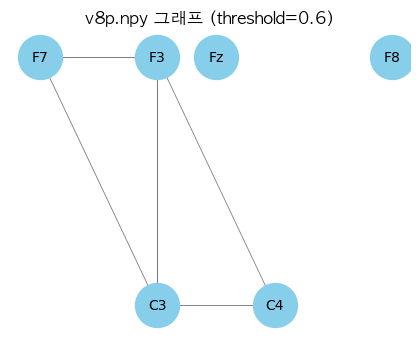

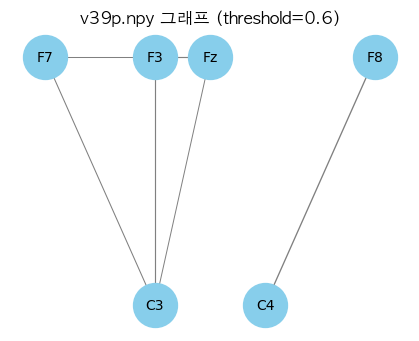

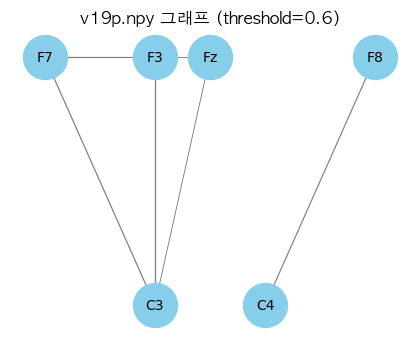

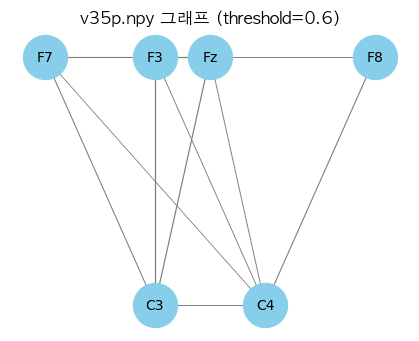

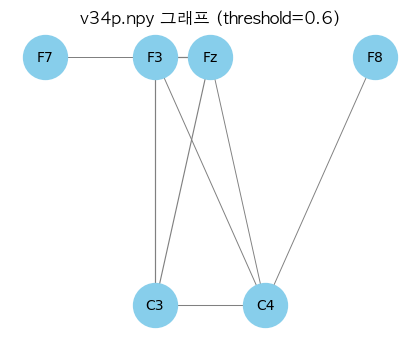

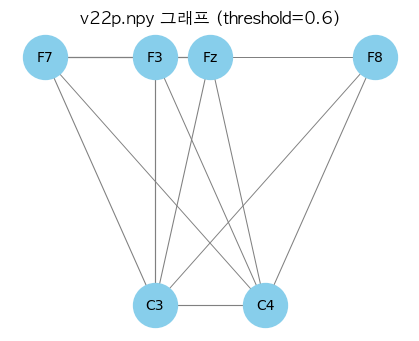

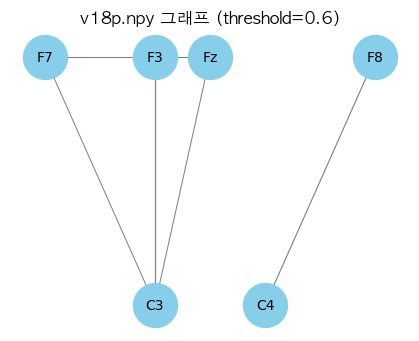

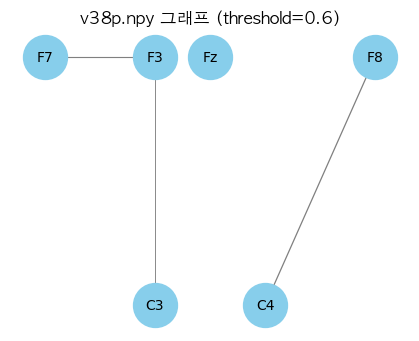

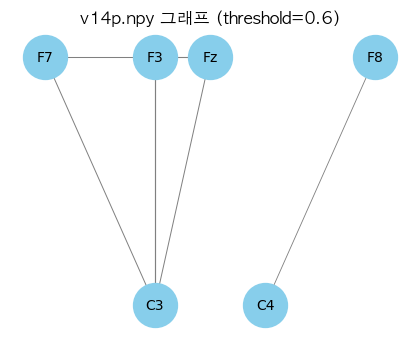

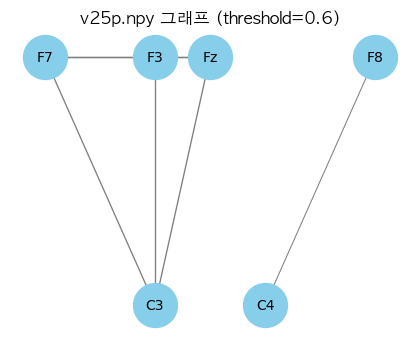

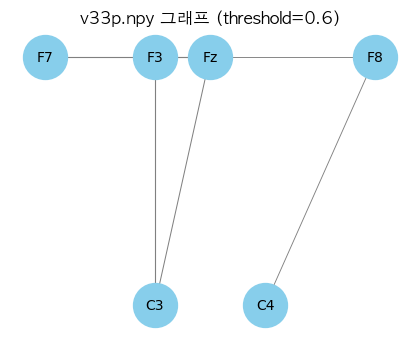

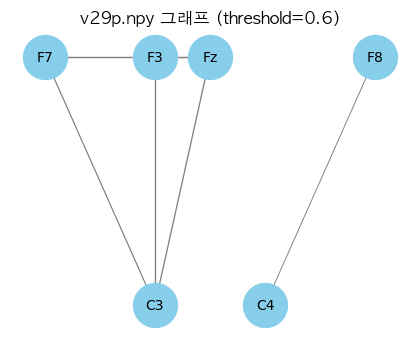

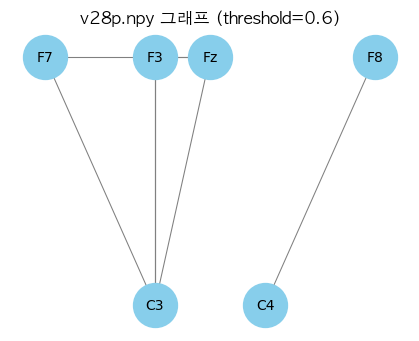

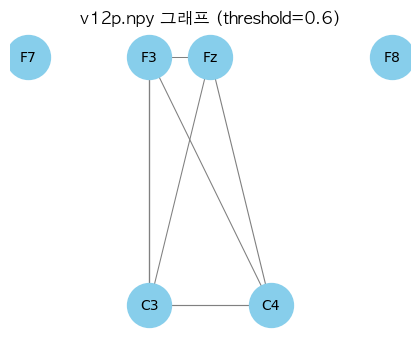

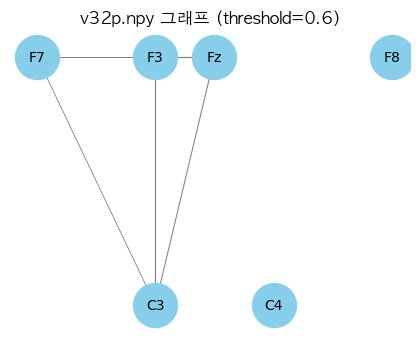

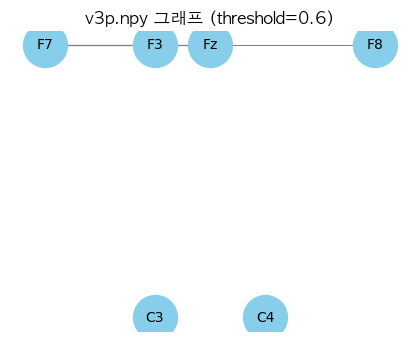

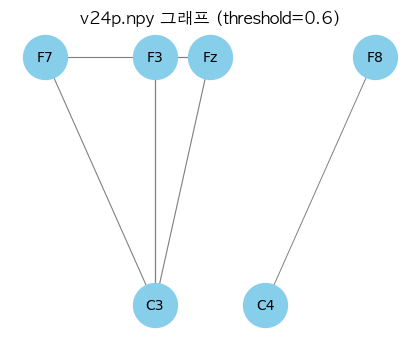

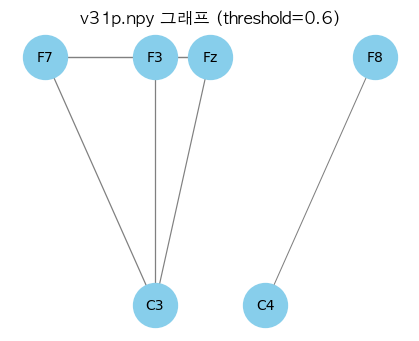

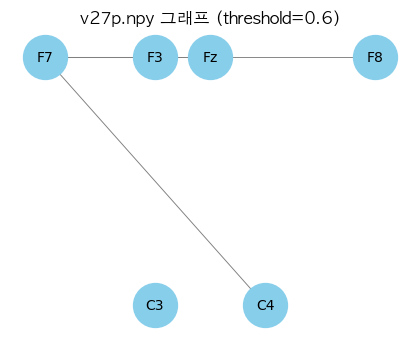

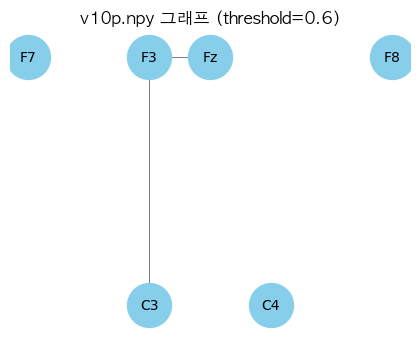

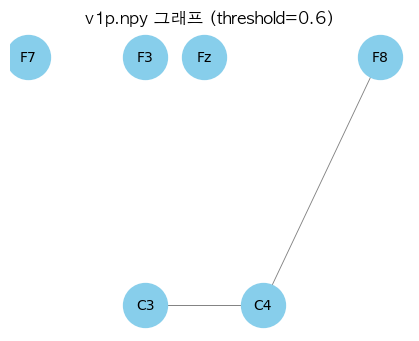

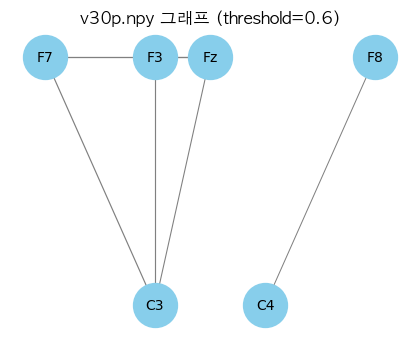

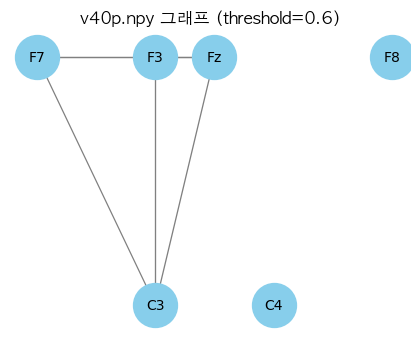

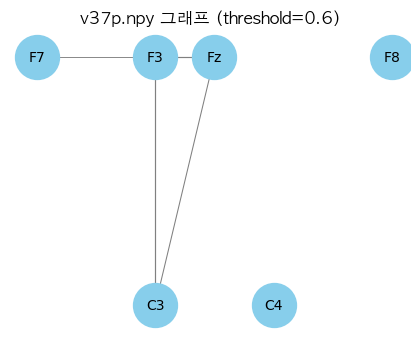

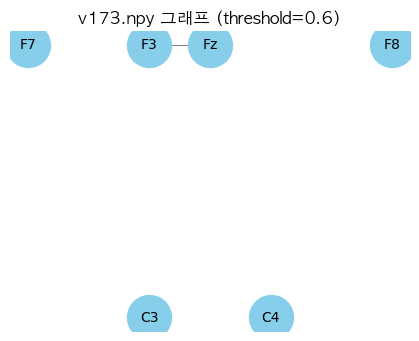

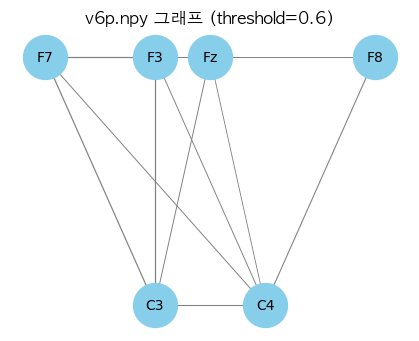

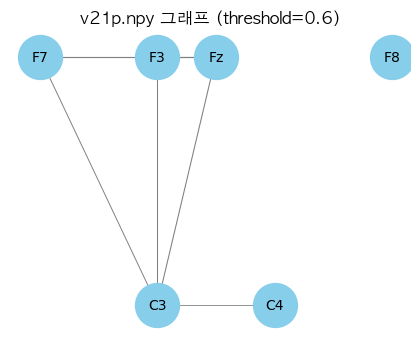

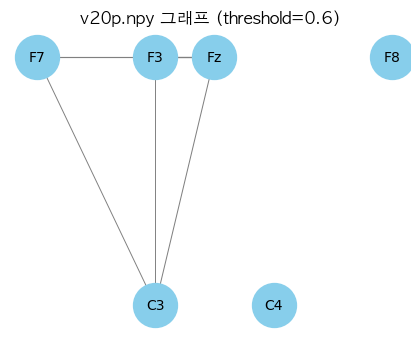

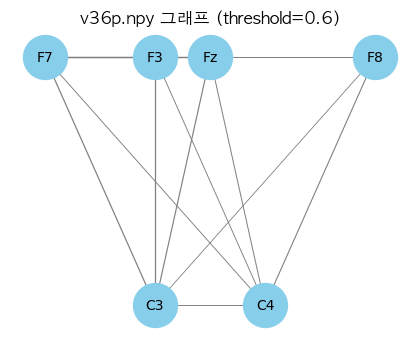

In [ ]:
channel_pos = {
    'F3': (-1, 3), 'Fz': (0, 3),'F7': (-3, 3), 'F8': (3, 3), 'C3': (-1, 2), 'C4': (1, 2)}

threshold = 0.6

for file_name in ADHD_1:
    file_path = os.path.join(ADHD_1_path, file_name)
    data = np.load(file_path)

    # 6채널 선택
    data = data[target_indices, :]
    adjacency_matrix = np.corrcoef(data)
    adjacency_matrix[np.abs(adjacency_matrix) < threshold] = 0

    # 그래프 생성
    G = nx.from_numpy_array(adjacency_matrix)
    G.remove_edges_from(nx.selfloop_edges(G))

    # 노드 이름 설정
    mapping = {i: target_channels[i] for i in range(len(target_channels))}
    G = nx.relabel_nodes(G, mapping)

    # 노드 위치 필터
    filtered_pos = {node: pos for node, pos in channel_pos.items() if node in G.nodes}

    # 엣지 가중치
    weights = [abs(G[u][v]['weight']) for u, v in G.edges()]

    # 시각화
    plt.figure(figsize=(4, 3))
    nx.draw(
        G,
        pos=filtered_pos,
        with_labels=True,
        edge_color='gray',
        width=weights,
        node_color='skyblue',
        node_size=1000,
        font_size=10
    )
    plt.title(f"{file_name} 그래프 (threshold={threshold})")
    plt.axis('off')
    plt.show()